In [22]:
import talib
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_pickle('R-TXF1-1Minute-Trade-2016.pkl')

## 移動平均

#### Reference
[WIKI](https://zh.wikipedia.org/wiki/%E7%A7%BB%E5%8B%95%E5%B9%B3%E5%9D%87)<br/>

#### SMA (Simple Moving Average)
![SMA](https://wikimedia.org/api/rest_v1/media/math/render/svg/2ca091381b0708af65cd607af43e552354f5da3b)

#### EMA (Exponential Moving Average)
![EMA](https://wikimedia.org/api/rest_v1/media/math/render/svg/2876a56ced4c67007c1a7a096cf0198eca0b8e99)
![EMA](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Weighted_moving_average_weights_N%3D15.png/440px-Weighted_moving_average_weights_N%3D15.png)

#### WMA (Weighted Moving Average)
![WMA](https://wikimedia.org/api/rest_v1/media/math/render/svg/85d9a8960d23d030f8a209046216c92a62749cf4)
![WMA](https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Exponential_moving_average_weights_N%3D15.png/440px-Exponential_moving_average_weights_N%3D15.png)

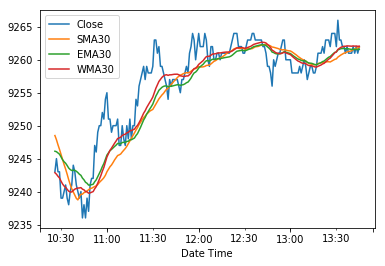

In [47]:
df['SMA30'] = talib.SMA(df['Close'], timeperiod=30)
df['EMA30'] = talib.EMA(df['Close'], timeperiod=30)
df['WMA30'] = talib.WMA(df['Close'], timeperiod=30)
df[['Close','SMA30','EMA30','WMA30']].tail(200).plot()

## MACD (Moving Average Convergence / Divergence)

#### 差離值（DIF值）
![DIF](https://wikimedia.org/api/rest_v1/media/math/render/svg/721d27957173f52b2ad64027f042b5ecc2f0e9d0)

#### 訊號線（DEM值，又稱MACD值）
![DEM](https://wikimedia.org/api/rest_v1/media/math/render/svg/70f7f95af25c0fd468783d564ee3f8f945fffa23)

#### 柱形圖或棒形圖（histogram / bar graph）
![HIS](https://wikimedia.org/api/rest_v1/media/math/render/svg/0096141b2952b5e2152137758102ef6bb70d58f3)

#### 圖示
![Graph](https://upload.wikimedia.org/wikipedia/commons/6/6a/MACD_example%2C_fast%3D12_slow%3D26_smooth%3D9.png)

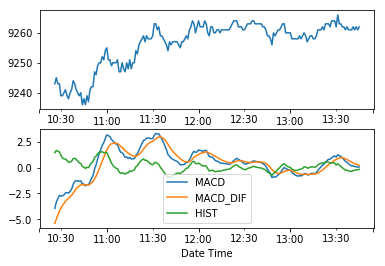

In [48]:
macd, signal, hist = talib.MACD(df['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_DIF'] = signal
df['HIST'] = hist
fig, axes = plt.subplots(nrows=2)
df['Close'].tail(200).plot(ax=axes[0])
df[['MACD', 'MACD_DIF', 'HIST']].tail(200).plot(ax=axes[1])

## 相對強弱指數（Relative Strength Index，RSI）

#### RSI 公式
![RSI](./RSI.png)

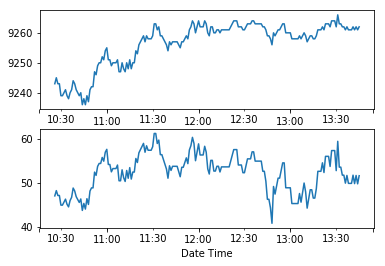

In [28]:
df['RSI30'] = talib.RSI(df['Close'], timeperiod=30)
fig, axes = plt.subplots(nrows=2)
df['Close'].tail(200).plot(ax=axes[0])
df['RSI30'].tail(200).plot(ax=axes[1])

## 布林帶（Bollinger Bands，BBands）

#### 計算
標準差

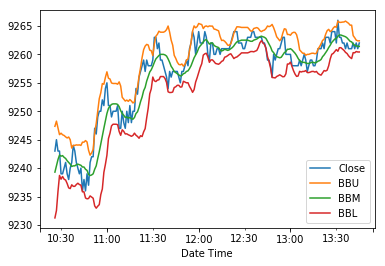

In [40]:
upper, middle, lower = talib.BBANDS(df['Close'], timeperiod=10, nbdevup=2, nbdevdn=2, matype=0)
df['BBU'] = upper
df['BBM'] = middle
df['BBL'] = lower
df[['Close','BBU','BBM','BBL']].tail(200).plot()

## 隨機指標（Stochastic Oscillator，KD）

#### RSV
![RSV](https://wikimedia.org/api/rest_v1/media/math/render/svg/6f8d6708302ac9212f342faa5da10c9b99f1cb69)

#### KD
![K](https://wikimedia.org/api/rest_v1/media/math/render/svg/2d785ce827c74a37a6a522090ad4b1197faec560)
![D](https://wikimedia.org/api/rest_v1/media/math/render/svg/0021cd675094a1b3d8c1acb4f9354ece9e93b04a)
![alpha](https://wikimedia.org/api/rest_v1/media/math/render/svg/1253877c614e2956a3cbed0f213b5752f54fabc2)

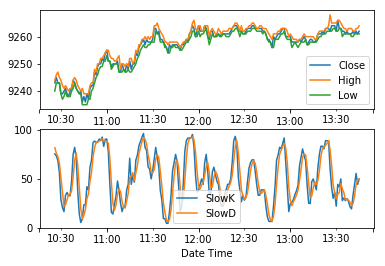

In [43]:
slowk,slowd = talib.STOCH(df['High'],df['Low'],df['Close'], fastk_period = 5,slowk_period=3,slowd_period=3)
df['SlowK'] = slowk
df['SlowD'] = slowd
fig, axes = plt.subplots(nrows=2)
df[['Close','High','Low']].tail(200).plot(ax=axes[0])
df[['SlowK','SlowD']].tail(200).plot(ax=axes[1])